## Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Resources
General: 
- Hands on Machine Learning with scikit-learn and tensorflow, chapter 5, 6, 7

- Machine Learnia : https://www.youtube.com/watch?v=w_bLGK4Pteo


Decision Trees: 
- https://scikit-learn.org/stable/modules/tree.html
- https://www.lovelyanalytics.com/2016/08/16/decision-tree-comment-ca-marche/
- https://www.youtube.com/watch?v=ZVR2Way4nwQ
- https://www.youtube.com/watch?v=sgQAhG5Q7iY

Random Forests:
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
- https://www.youtube.com/watch?v=v6VJ2RO66Ag

SVM: 
- https://scikit-learn.org/stable/modules/svm.html
- https://towardsdatascience.com/a-brief-introduction-to-support-vector-machine-adf0f103a80f
- https://www.youtube.com/watch?v=_YPScrckx28
- https://www.youtube.com/watch?v=Q7vT0--5VII

Learning Curves: 
- https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
- https://towardsdatascience.com/why-you-should-be-plotting-learning-curves-in-your-next-machine-learning-project-221bae60c53

Validation Curves 
- https://scikit-learn.org/stable/modules/learning_curve.html

- Take some time to read book sections for decision tree, random forest and SVM algorithms.
- Import these algorithms from scikit-learn and find the hyperparameter options that are available when they are instantiated.


## Decision trees

Explain here how they work in your own words:

<span style='color:green'> Decision tree: </span>
<span style='color:pink'> a supervised ML algo (used for classification and regression). The main principle is splitting the data into subsets based on the value of input features. Each splitting is called "node". Criteria of splitting are Gini impurity (probability of a randomly chosen element to be classified wrong (0 means all elements belong to one class, higher impurity - mixed classes)), informatio gain (reduction in entropy after splitting, higher entropy means good distribution, low entropy - good separation, low uncertainty), MSE.

<span style='color:pink'>It ends in case of max. depth, when no good split was found, or when classificatio is done (node has data points of a single class) or when a node has a ceertain min. number of data points (for regression)</span>
    
<span style='color:green'> Random Forests: </span>
<span style='color:pink'> an ensemble ML algo (used for classification and regression). The main principle is a usage of MULTIPLE decision tree models on multiple SUBSETS of the original data.Dividing into subsets happens due to Bagging or Bootstrap aggregation (sampling with replacement: so some data points appear multiple times in a subset or may not appear at all). each subset has the same amount of data points as the original data set. After training there is "aggregation" to get a final result (majority of votes of each prediction or the everage of all prediction). In Random forest, the features are selected randomply for each subset to minimize correlation between trees. So averaging of many trees reduces variance and gets a better prediction compare to Decision tree. </span>
    
<span style='color:green'> Support Vector Machines or SVM: </span>
<span style='color:pink'>a set of supervised ML algo (for classification and regression, but mostly for classification). The idea behind SVM is to find a hyperplane (a line, a plane or a hyperplane for n-dim) that best separates the data points of different classes. To create this plane/line the distance (margin) to each closest data point (support vectors) is calculted and maximized by moving the plane/line (larger margin generally implies better generalization to unseen data). In cases of non-linear separated data Soft Margin (adds a parameter for each data point - slack variables: 0 for correctly classiied and higher for worse classified points. it minimizes the weight of a sum of a hyperplane and sum of slack varaibles) can be used. Also Kernel Trick: transform data to a higher dim and separate the data linearly.</span>

In [2]:
# Load dataset
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

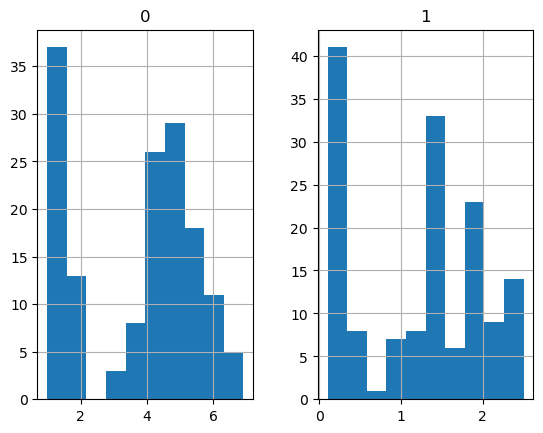

In [3]:
plots = pd.DataFrame(X).hist()

In [4]:
pd.DataFrame(X).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
dtypes: float64(2)
memory usage: 2.5 KB


In [5]:
pd.DataFrame(y).describe()

,0
count,150.000000
mean,1.000000
std,0.819232
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 101, 
                                                    test_size = 0.2)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Train a decision tree with max_depth=2
from sklearn.tree import DecisionTreeClassifier

model_Tree = DecisionTreeClassifier(max_depth=2)

model_Tree.fit(X_train_scaled,y_train)
y_pred = model_Tree.predict(X_test_scaled)

In [9]:
from sklearn.metrics import classification_report, confusion_matrix,  precision_score, recall_score, accuracy_score, f1_score

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.86      1.00      0.92        12
           2       1.00      0.75      0.86         8

    accuracy                           0.93        30
   macro avg       0.95      0.92      0.93        30
weighted avg       0.94      0.93      0.93        30



In [10]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2
0,10,0,0
1,0,12,0
2,0,2,6


### Visualization: export_graphviz

In [11]:
# Visualize decision tree using graphviz 
from sklearn.tree import export_graphviz

dot_data = export_graphviz(model_Tree, out_file=None, 
                           feature_names=iris.feature_names[:2],  
                           class_names=iris.target_names,  
                           filled=True, rounded=True,  
                           special_characters=True)

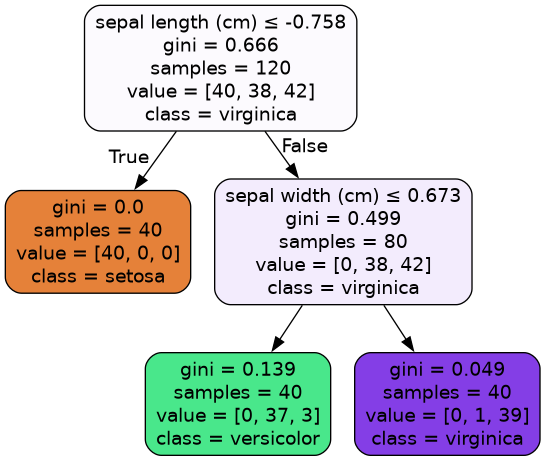

In [12]:
import pygraphviz
from IPython.display import Image

graph = pygraphviz.AGraph(dot_data)
graph.layout(prog='dot')
graph.draw("iris_tree.png")
Image("iris_tree.png")

In [13]:
# open image with PIL
from PIL import Image
image = Image.open("iris_tree.png")
image.show()

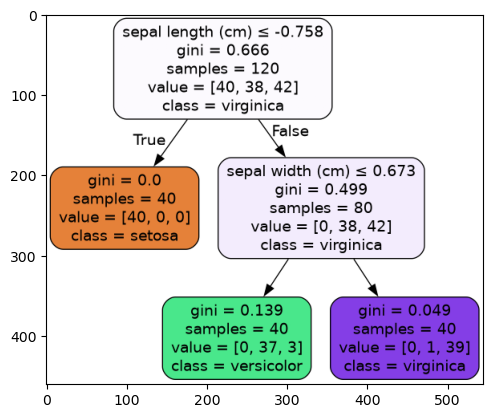

In [14]:
# open image with matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('iris_tree.png')
imgplot = plt.imshow(img)

### Visualization: plot_tree

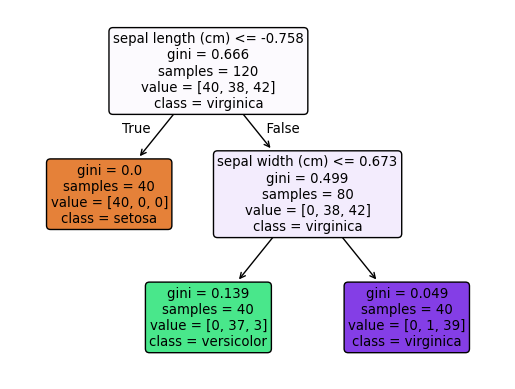

In [15]:
# visualize using the 'plot_tree' method (from the sklearn.tree module)
from sklearn.tree import plot_tree
plot = plot_tree(model_Tree, feature_names = iris.feature_names[:2], class_names = iris.target_names, filled=True,rounded=True)

Compute the predictions of a decision tree classifier on a test set and calculate all the classification metrics you know:


In [16]:
from sklearn.metrics import average_precision_score, roc_auc_score

y_proba = model_Tree.predict_proba(X_test_scaled)

print(f'accuracy_score: {accuracy_score(y_test,y_pred)}')
print(f'precision_score: {precision_score(y_pred,y_test,average="macro")}')
print(f'recall_score: {recall_score(y_pred,y_test,average="macro")}')
print(f'f1_score: {f1_score(y_pred,y_test,average="macro")}')
# print(f'average_precision_score: {average_precision_score(y_test,y_pred,average="macro")}')
print(f'roc_auc_score: {roc_auc_score(y_test,y_proba,multi_class="ovr")}')

accuracy_score: 0.9333333333333333
precision_score: 0.9166666666666666
recall_score: 0.9523809523809524
f1_score: 0.9267399267399267
roc_auc_score: 0.9587542087542088


In [17]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2
0,10,0,0
1,0,12,0
2,0,2,6


In [18]:
# split in train and test set


In [19]:
# fit classifier with max_depth=2


In [20]:
# make predictions on the test set


In [21]:
# Print Accuracy
# Print Confusion matrix
# Print Precision
# Print Recall
# Print F1-score


## Random forests

Explain here how they work in your own words:

In [22]:
# fit a Random Forest classifier 
from sklearn.ensemble import RandomForestClassifier

model_Forest = RandomForestClassifier()

In [23]:
# make predictions on the test set

model_Forest.fit(X_train_scaled,y_train)
y_pred = model_Forest.predict(X_test_scaled)

In [24]:
# Print Accuracy
# Print Confusion matrix
# Print Precision
# Print Recall
# Print F1-score
print(f'accuracy_score: {accuracy_score(y_test,y_pred):.3f}')
print(f'precision_score: {precision_score(y_pred,y_test,average="macro"):.3f}')
print(f'recall_score: {recall_score(y_pred,y_test,average="macro"):.3f}')
print(f'f1_score: {f1_score(y_pred,y_test,average="macro"):.3f}')

accuracy_score: 0.967
precision_score: 0.958
recall_score: 0.974
f1_score: 0.964


In [25]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2
0,10,0,0
1,0,12,0
2,0,1,7


## SVM

Explain here how they work in your own words:

In [26]:
# Book example SVM: iris dataset
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

model_LinearSVC = SVC(C=1,
                      kernel='linear'
                      # loss="hinge",
                      # multi_class='ovr'
                     )

model_LinearSVC.fit(X_train_scaled, y_train)
y_pred = model_LinearSVC.predict(X_test_scaled)

In [27]:
# fit a linear SVM classifier

In [28]:
# make predictions on the test set


In [29]:
# Print Accuracy
# Print Confusion matrix
# Print Precision
# Print Recall
# Print F1-score
print(f'accuracy_score: {accuracy_score(y_test,y_pred):.3f}')
print(f'precision_score: {precision_score(y_pred,y_test,average="macro"):.3f}')
print(f'recall_score: {recall_score(y_pred,y_test,average="macro"):.3f}')
print(f'f1_score: {f1_score(y_pred,y_test,average="macro"):.3f}')

accuracy_score: 0.967
precision_score: 0.958
recall_score: 0.974
f1_score: 0.964


In [30]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2
0,10,0,0
1,0,12,0
2,0,1,7


## Learning curves

### Book example

In [31]:
# Book Dataset
def plot_learning_curves(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    train_errors, test_errors = [], []
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    for m in range(1, len(X_train_scaled)):
        model.fit(X_train_scaled[:m], y_train[:m])
        y_train_predict = model.predict(X_train_scaled[:m])
        y_test_predict = model.predict(X_test_scaled)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        test_errors.append(mean_squared_error(y_test, y_test_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="val")
    plt.legend()
    plt.xlabel('Training set size')
    plt.ylabel('RMSE')

In [32]:
# Implement the book’s code on learning curves on the data he has used.
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

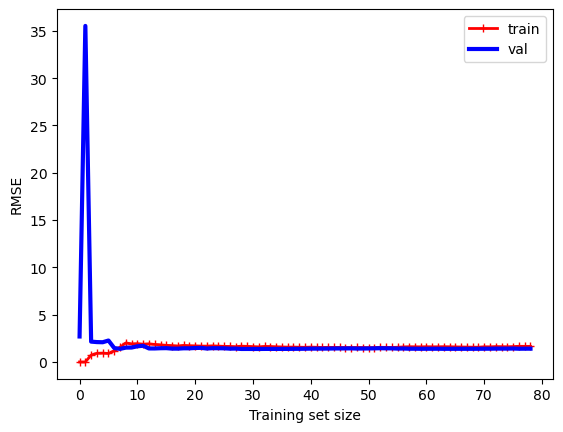

In [33]:
from sklearn.linear_model import LinearRegression
from skimage.metrics import mean_squared_error

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

Change the method so that instead of having an incremental training set size going from 1 to the size of X_train, you have a fixed set of training sizes.
For example: 

training_set_sizes = np.linspace(2, len(X_train), len(X_train), dtype='int')

or 

training_set_sizes = [1, 10, 20, 30, 40, 50, 60, 70, 80]

In [34]:
# Method that plots learning curves for a given estimator and training_set_sizes
def your_method_name_for_plotting_learning_curves(model, X, y, training_set_sizes=None):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    train_errors, test_errors = [], []
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    if training_set_sizes is None:
        training_set_sizes = np.linspace(2, len(X_train_scaled), len(X_train_scaled), dtype='int')
    
    for m in training_set_sizes:
        model.fit(X_train_scaled[:m], y_train[:m])
        y_train_predict = model.predict(X_train_scaled[:m])
        y_test_predict = model.predict(X_test_scaled)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        test_errors.append(mean_squared_error(y_test, y_test_predict))
        
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="val")
    plt.legend()
    plt.xlabel('Training set size')
    plt.ylabel('RMSE')

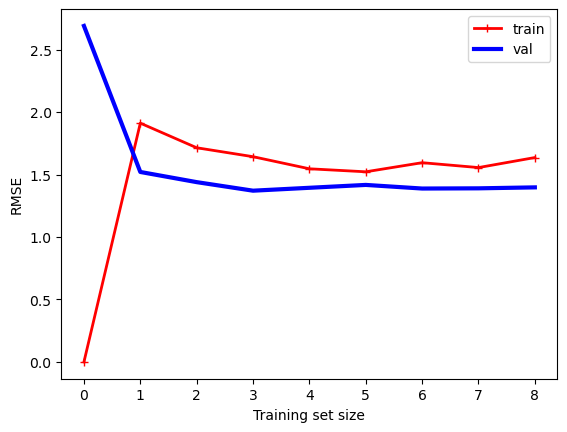

In [35]:
your_method_name_for_plotting_learning_curves(lin_reg, X, y, training_set_sizes = [1, 10, 20, 30, 40, 50, 60, 70, 80])

## Learning curves for classifiers

Implement a ML problem on a dataset you have already seen in the course. 

Produce a plot of a model which shows signs of underfitting, and one that shows signs of overfitting.

In [36]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
# create your method to plot your learning curves using the sklearn method learning_curve()

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, 
                                                            train_sizes=train_sizes, scoring='accuracy',
                                                            shuffle=False)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    if axes is None:
        axes = plt.gca()
    
    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
        
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Accuracy")
    
    axes.grid()
    
    # Plot the learning curve
    axes.fill_between(train_sizes, (train_scores_mean - train_scores_std), 
                      (train_scores_mean + train_scores_std), alpha=0.1, color="r")
    axes.fill_between(train_sizes, (test_scores_mean - test_scores_std), 
                      (test_scores_mean + test_scores_std), alpha=0.1, color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    axes.legend(loc="best")

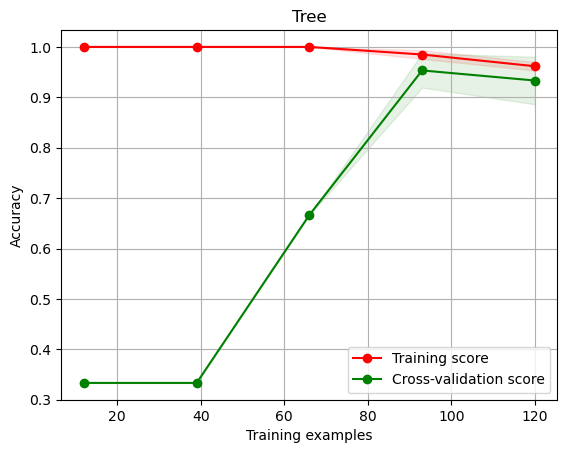

In [62]:
X = iris.data[:, 2:] # petal length and width
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

plot_learning_curve(model_Tree, 'Tree', X, y, axes=None, ylim=None, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))

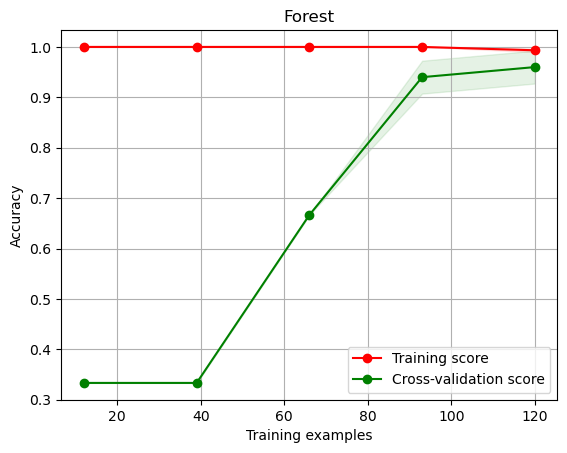

In [38]:
plot_learning_curve(model_Forest, 'Forest', X, y, axes=None, ylim=None, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))

/home/dmitrii.druzhbin@Digital-Grenoble.local/anaconda3/envs/jupyterlab3.6.7/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/home/dmitrii.druzhbin@Digital-Grenoble.local/anaconda3/envs/jupyterlab3.6.7/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/dmitrii.druzhbin@Digital-Grenoble.local/anaconda3/envs/jupyterlab3.6.7/lib/python3.11/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimato

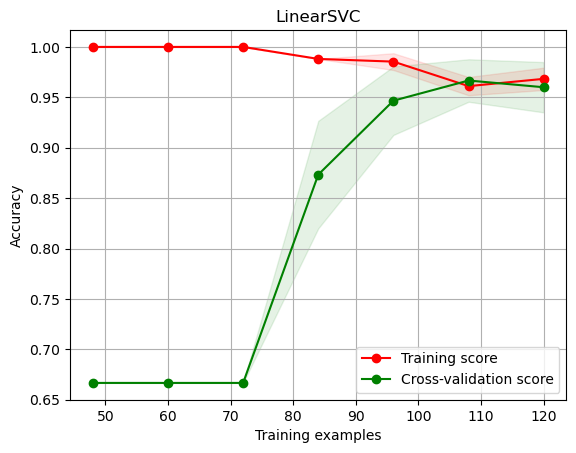

In [39]:
plot_learning_curve(model_LinearSVC, 'LinearSVC', X, y, axes=None, ylim=None, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 10))

## Decision trees learning curves

In [40]:
# import the dataset you want
df = pd.read_csv('../data/diabetes.csv')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [42]:
df.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [43]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

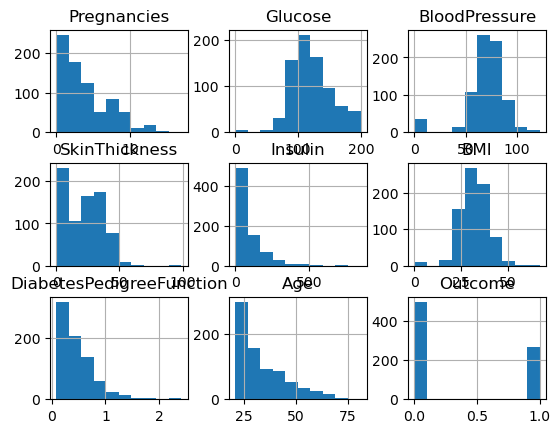

In [44]:
# df['Kyphosis'] = df['Kyphosis'].map({'absent': 0, 'present': 1})
df.hist()

In [45]:
X = df.copy()
y = X.pop('Outcome')

In [46]:
# do all the pre-rpocessing that is needed
# from sklearn.impute import SimpleImputer
pipeline_tree = Pipeline([
        ('scaler', StandardScaler()),
        ('tree', DecisionTreeClassifier())
    ])

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    # stratify=y
                                                   )

In [48]:
# Underfit model
# Train a decision tree with max_depth=2

In [49]:
pipeline_tree.set_params(tree__max_depth=2)
pipeline_tree.fit(X_train,y_train)
y_pred = pipeline_tree.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        99
           1       0.73      0.58      0.65        55

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154



In [50]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1
0,87,12
1,23,32


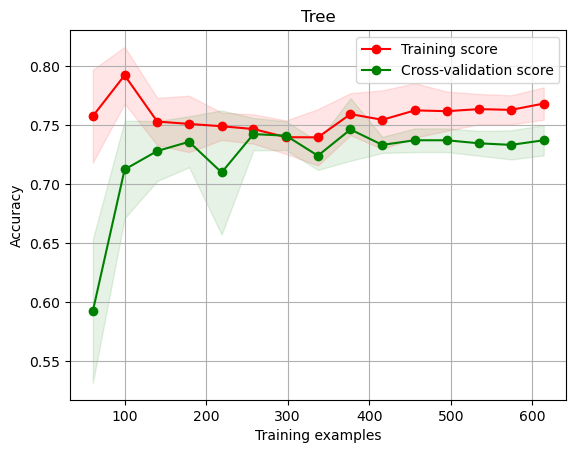

In [51]:
plot_learning_curve(pipeline_tree, 'Tree', X, y, axes=None, ylim=None, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 15))

In [52]:
# Overfit model
# Train a decision tree with max_depth=10

In [53]:
pipeline_tree.set_params(tree__max_depth=10)
pipeline_tree.fit(X_train,y_train)
y_pred = pipeline_tree.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        99
           1       0.66      0.69      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



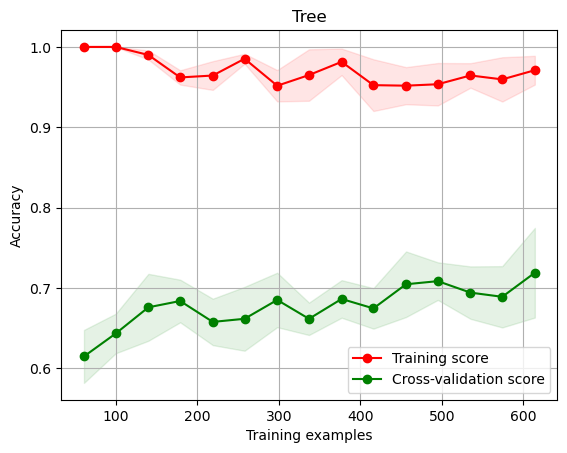

In [54]:
plot_learning_curve(pipeline_tree, 'Tree', X, y, axes=None, ylim=None, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 15))

In [64]:
X_train_scaled.shape

(120, 2)

In [63]:
y_train.shape

(120,)

In [65]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': range(1,21)
}

grid_search = GridSearchCV(pipeline_tree.named_steps['tree'], 
                           param_grid, 
                           cv = 5, 
                           scoring='accuracy', 
                           return_train_score=True, 
                           n_jobs=-1)
grid_search.fit(X_train_scaled,y_train)

/home/dmitrii.druzhbin@Digital-Grenoble.local/anaconda3/envs/jupyterlab3.6.7/lib/python3.11/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=10), n_jobs=-1,
             param_grid={'max_depth': range(1, 21)}, return_train_score=True,
             scoring='accuracy')

<Axes: xlabel='param_max_depth', ylabel='mean_train_score'>

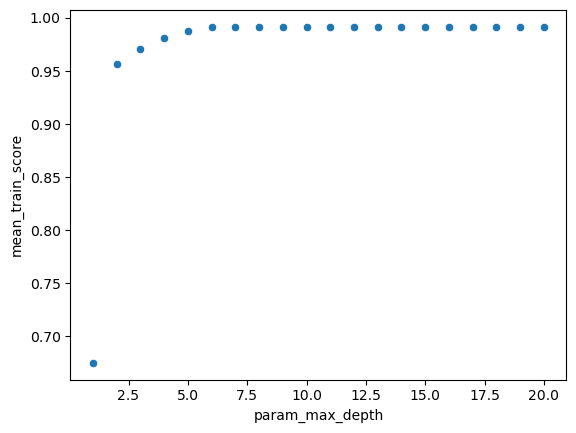

In [67]:
import seaborn as sns
sns.scatterplot(pd.DataFrame(grid_search.cv_results_), x = 'param_max_depth', y = 'mean_train_score')

In [68]:
grid_search.best_estimator_.fit(X_train_scaled,y_train)
y_pred = grid_search.best_estimator_.predict(X_test_scaled)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [69]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2
0,10,0,0
1,0,9,0
2,0,0,11


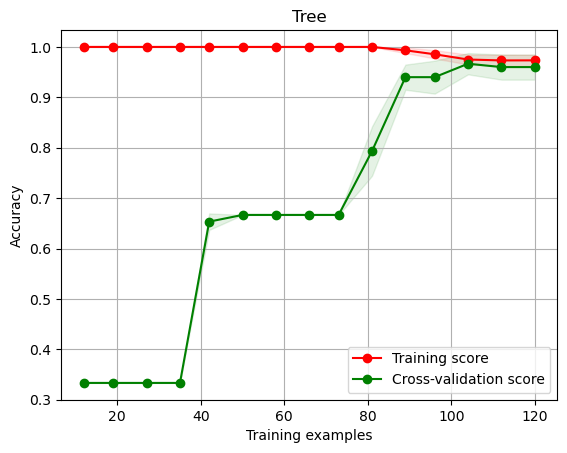

In [70]:
plot_learning_curve(grid_search.best_estimator_, 'Tree', X, y, axes=None, ylim=None, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 15))

## Random forests classifier learning curves

In [71]:
pipeline_forest = Pipeline([
        ('scaler', StandardScaler()),
        ('forest', RandomForestClassifier(random_state=42))
    ])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

RMSE (train): 1.281
RMSE (test): 0.000


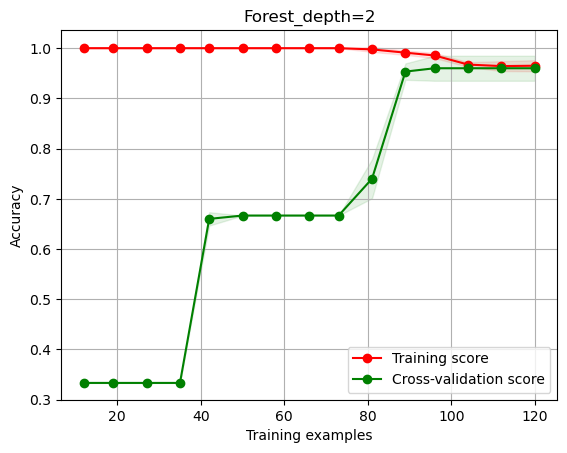

In [72]:
# Underfit model
pipeline_forest.set_params(forest__max_depth=2)
pipeline_forest.fit(X_train,y_train)
y_pred = pipeline_forest.predict(X_test)
print(classification_report(y_test,y_pred))
print(f'RMSE (train): {np.sqrt(mean_squared_error(y_train,pipeline_forest.predict(X_train_scaled))):.3f}')
print(f'RMSE (test): {np.sqrt(mean_squared_error(y_test,y_pred)):.3f}')

plot_learning_curve(pipeline_forest, 'Forest_depth=2', X, y, axes=None, ylim=None, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 15))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

RMSE (train): 1.281
RMSE (test): 0.000


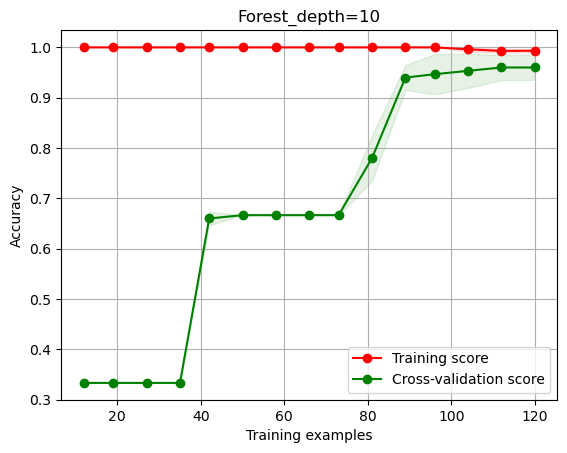

In [73]:
# Overfit model
pipeline_forest.set_params(forest__max_depth=10)
pipeline_forest.fit(X_train,y_train)
y_pred = pipeline_forest.predict(X_test)
print(classification_report(y_test,y_pred))
print(f'RMSE (train): {np.sqrt(mean_squared_error(y_train,pipeline_forest.predict(X_train_scaled))):.3f}')
print(f'RMSE (test): {np.sqrt(mean_squared_error(y_test,y_pred)):.3f}')

plot_learning_curve(pipeline_forest, 'Forest_depth=10', X, y, axes=None, ylim=None, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 15))

In [74]:
grid_search = GridSearchCV(pipeline_forest.named_steps['forest'], 
                           param_grid, 
                           cv = 5, 
                           scoring='average_precision', 
                           return_train_score=True, 
                           n_jobs=-1)
grid_search.fit(X_train_scaled,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=10, random_state=42),
             n_jobs=-1, param_grid={'max_depth': range(1, 21)},
             return_train_score=True, scoring='average_precision')

<Axes: xlabel='param_max_depth', ylabel='mean_train_score'>

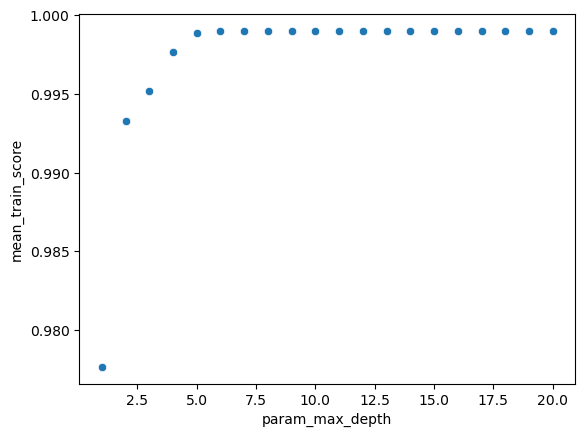

In [75]:
sns.scatterplot(pd.DataFrame(grid_search.cv_results_), x = 'param_max_depth', y = 'mean_train_score')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

RMSE (train): 0.204
RMSE (test): 0.000


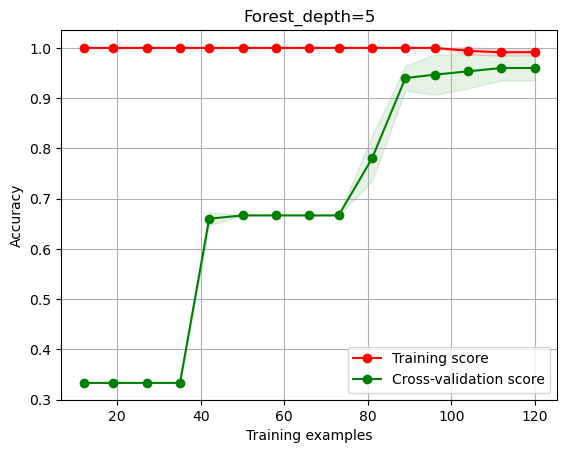

In [76]:
grid_search.best_estimator_.fit(X_train_scaled,y_train)
y_pred = grid_search.best_estimator_.predict(X_test_scaled)
print(classification_report(y_test,y_pred))
print(f'RMSE (train): {np.sqrt(mean_squared_error(y_train,grid_search.best_estimator_.predict(X_train_scaled))):.3f}')
print(f'RMSE (test): {np.sqrt(mean_squared_error(y_test,y_pred)):.3f}')

pipeline_forest.set_params(forest__max_depth=5)
plot_learning_curve(pipeline_forest, 'Forest_depth=5', X, y, axes=None, ylim=None, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 15))

## SVM

SVM Advantages:

- SVM’s are very good when we have no idea on the data.
- Works well with even unstructured and semi structured data like text, Images and trees.
- The kernel trick is real strength of SVM. With an appropriate kernel function, we can solve any complex problem.
- Unlike in neural networks, SVM is not solved for local optima.
- It scales relatively well to high dimensional data.
- SVM models have good generalization in practice, the risk of over-fitting is less in SVM.

SVM Disadvantages:

- Choosing a “good” kernel function is not easy.
- Long training time for large datasets.
- Difficult to understand and interpret the final model, variable weights and individual impact.
- The SVM hyper parameters are Cost -C and gamma. It is not that easy to fine-tune these hyper-parameters. It is hard to visualize their impact

In [77]:
pipeline_SVC = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', SVC(kernel='linear'))
    ])

In [78]:
param_grid = {
    'C': [0.001,0.01,0.1,1,10,50,100],
    'gamma': [0.001,0.01,0.1,1,10,50,100]
}

grid_search = GridSearchCV(pipeline_SVC.named_steps['classifier'], 
                           param_grid, 
                           cv = 5, 
                           scoring='average_precision', 
                           return_train_score=True, 
                           n_jobs=-1)
grid_search.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 50, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 50, 100]},
             return_train_score=True, scoring='average_precision')

In [79]:
print("Best parameters : {}".format(grid_search.best_params_))
print("Best cross validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator: {}".format(grid_search.best_estimator_))

Best parameters : {'C': 0.1, 'gamma': 0.001}
Best cross validation score: 0.98
Best estimator: SVC(C=0.1, gamma=0.001, kernel='linear')


<Axes: >

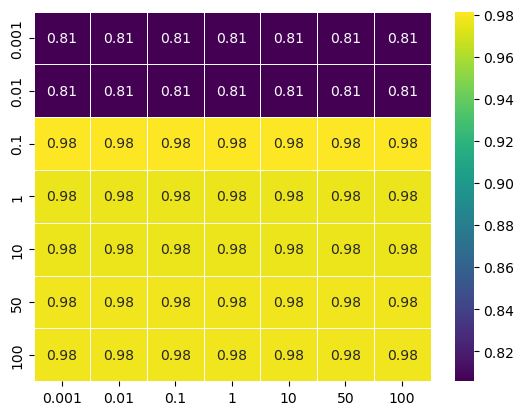

In [80]:
results = pd.DataFrame(grid_search.cv_results_)
scores = np.array(results.mean_test_score).reshape(7,7)
sns.heatmap(scores,xticklabels=param_grid['gamma'],
             yticklabels=param_grid['C'],cmap='viridis', annot= True, linewidth=0.5)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

RMSE (train): 0.224
RMSE (test): 0.000


/home/dmitrii.druzhbin@Digital-Grenoble.local/anaconda3/envs/jupyterlab3.6.7/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/home/dmitrii.druzhbin@Digital-Grenoble.local/anaconda3/envs/jupyterlab3.6.7/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/dmitrii.druzhbin@Digital-Grenoble.local/anaconda3/envs/jupyterlab3.6.7/lib/python3.11/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimato

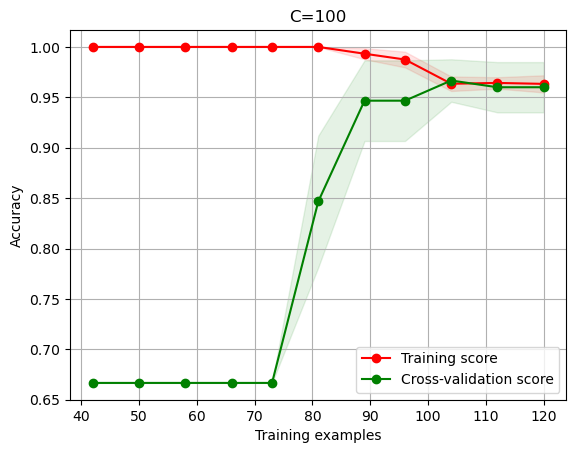

In [81]:
y_pred = grid_search.best_estimator_.predict(X_test_scaled)

print(classification_report(y_test,y_pred))
print(f'RMSE (train): {np.sqrt(mean_squared_error(y_train,grid_search.best_estimator_.predict(X_train_scaled))):.3f}')
print(f'RMSE (test): {np.sqrt(mean_squared_error(y_test,y_pred)):.3f}')
pipeline_SVC.set_params(classifier__C=100)
plot_learning_curve(pipeline_SVC, f'C=100', X, y, axes=None, ylim=None, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 15))

/home/dmitrii.druzhbin@Digital-Grenoble.local/anaconda3/envs/jupyterlab3.6.7/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dmitrii.druzhbin@Digital-Grenoble.local/anaconda3/envs/jupyterlab3.6.7/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dmitrii.druzhbin@Digital-Grenoble.local/anaconda3/envs/jupyterlab3.6.7/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.30      1.00      0.46         9
           2       0.00      0.00      0.00        11

    accuracy                           0.30        30
   macro avg       0.10      0.33      0.15        30
weighted avg       0.09      0.30      0.14        30

RMSE (train): 0.811
RMSE (test): 0.837


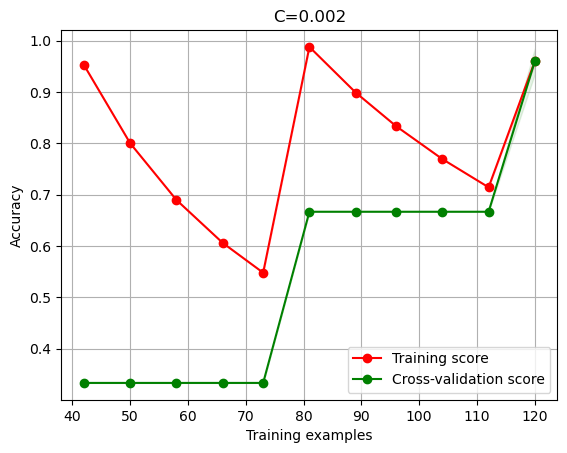

In [82]:
# Underfit model?
C = 0.002
pipeline_SVC.set_params(classifier__C=C)
pipeline_SVC.fit(X_train_scaled,y_train)
y_pred = pipeline_SVC.predict(X_test_scaled)

print(classification_report(y_test,y_pred))
print(f'RMSE (train): {np.sqrt(mean_squared_error(y_train,pipeline_SVC.predict(X_train_scaled))):.3f}')
print(f'RMSE (test): {np.sqrt(mean_squared_error(y_test,y_pred)):.3f}')
plot_learning_curve(pipeline_SVC, f'C={C}', X, y, axes=None, ylim=None, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 15))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

RMSE (train): 0.204
RMSE (test): 0.000


/home/dmitrii.druzhbin@Digital-Grenoble.local/anaconda3/envs/jupyterlab3.6.7/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/home/dmitrii.druzhbin@Digital-Grenoble.local/anaconda3/envs/jupyterlab3.6.7/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/dmitrii.druzhbin@Digital-Grenoble.local/anaconda3/envs/jupyterlab3.6.7/lib/python3.11/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimato

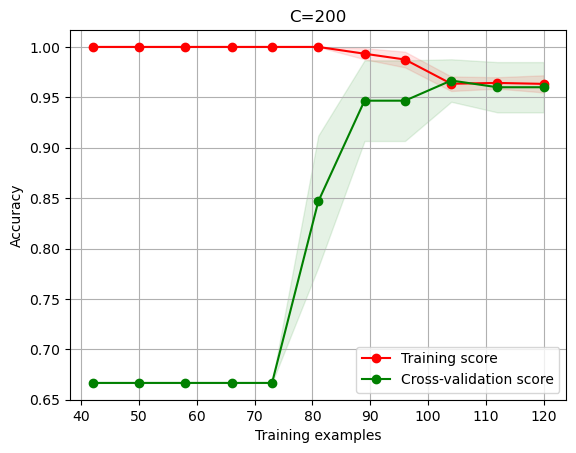

In [83]:
# Overfit model?
C = 200
pipeline_SVC.set_params(classifier__C=C)
pipeline_SVC.fit(X_train_scaled,y_train)
y_pred = pipeline_SVC.predict(X_test_scaled)

print(classification_report(y_test,y_pred))
print(f'RMSE (train): {np.sqrt(mean_squared_error(y_train,pipeline_SVC.predict(X_train_scaled))):.3f}')
print(f'RMSE (test): {np.sqrt(mean_squared_error(y_test,y_pred)):.3f}')
plot_learning_curve(pipeline_SVC, f'C={C}', X, y, axes=None, ylim=None, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 15))

## Validation curves

Validation curves are a useful tool for improving the performance of a model by addressing issues such as overfitting or underfitting. Validation curves are related to learning curves, but instead of plotting the training and test accuracies as functions of the sample size, we vary the values of the model parameters. They are complementaru of GridSearch and make for a very nice visual tool for ypur algorithm optimization. 


In [84]:
from sklearn.model_selection import validation_curve

def plot_validation_curve(estimator, title, X, y, param_names, param_ranges, cv=None, scoring=None, n_jobs=-1, ylim=None, axes=None):

    # create your method to plot your learning curves using the sklearn method validation_curve()
    for idx, (param_name, param_range) in enumerate(zip(param_names, param_ranges)):
        train_scores, test_scores = validation_curve(
            estimator, X, y, param_name=param_name, param_range=param_range,
            cv=cv, scoring=scoring, n_jobs=n_jobs)

        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        if axes is None:
            fig, axes = plt.subplots(1, len(param_names), figsize=(5 * len(param_names), 5))

        ax = axes[idx]
        if ylim is not None:
            axes.set_ylim(*ylim)

        ax.set_title(f"{title} ({param_name})")
        ax.set_xlabel(param_name)
        ax.set_ylabel("Score")

        lw = 2
        ax.plot(param_range, train_scores_mean, label="Training score",
                  color="darkorange", lw=lw)
        ax.fill_between(param_range, train_scores_mean - train_scores_std,
                          train_scores_mean + train_scores_std, alpha=0.2,
                          color="darkorange", lw=lw)
        ax.plot(param_range, test_scores_mean, label="Cross-validation score",
                  color="navy", lw=lw)
        ax.fill_between(param_range, test_scores_mean - test_scores_std,
                          test_scores_mean + test_scores_std, alpha=0.2,
                          color="navy", lw=lw)

        ax.legend(loc="best")
    plt.tight_layout()
    plt.show()

Plot the validation curves for a chosen algorithm and vary 1 or 2 parameters of your choice.

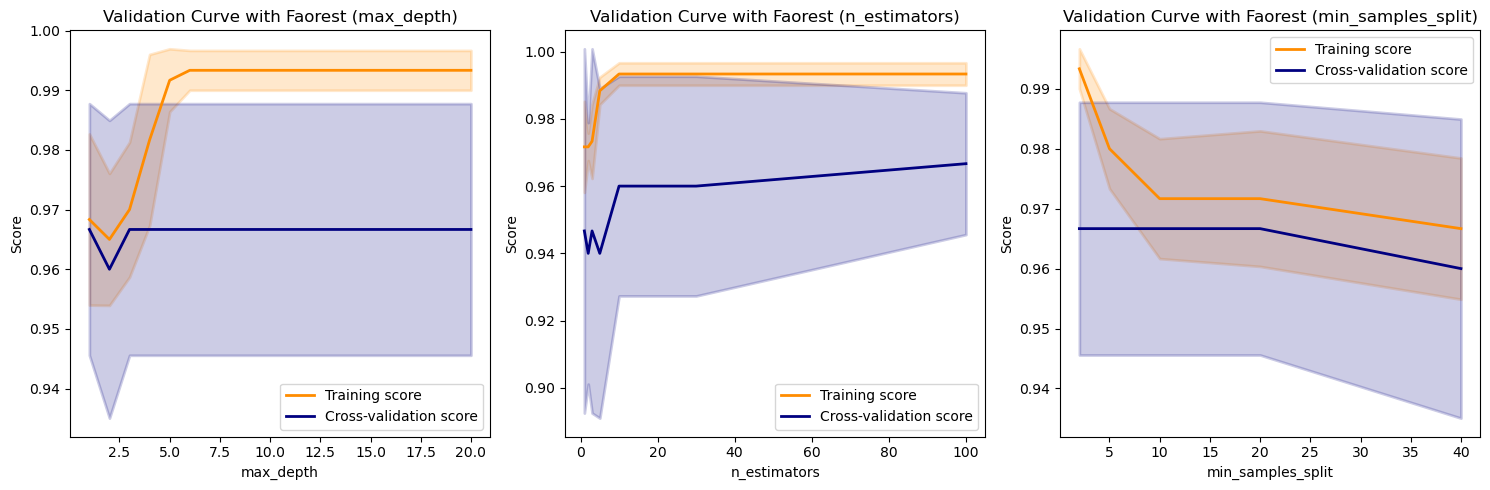

In [90]:
plot_validation_curve(
    RandomForestClassifier(random_state=42), "Validation Curve with Faorest", X, y, param_names=["max_depth","n_estimators","min_samples_split"],
    param_ranges=[range(1,21),[1,2,3,5,10, 20, 30, 100],[2, 5, 10, 20, 40]], cv=5, scoring="accuracy"
)

Do a GridSearch and see if the most optimal parameter is coherent with what you see on your validation curves

In [89]:
param_grid = {
    "max_depth": range(1,21),
    "n_estimators": [1,2,3,5,10, 20, 30, 100],
    "min_samples_split": [2, 5, 10, 20, 40]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), 
                           param_grid, 
                           cv = 5, 
                           scoring='accuracy', 
                           return_train_score=True, 
                           n_jobs=-1)
grid_search.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(1, 21),
                         'min_samples_split': [2, 5, 10, 20, 40],
                         'n_estimators': [1, 2, 3, 5, 10, 20, 30, 100]},
             return_train_score=True, scoring='accuracy')

In [87]:
grid_search.best_estimator_.fit(X_train_scaled,y_train)
y_pred = grid_search.best_estimator_.predict(X_test_scaled)

In [88]:
print(classification_report(y_test,y_pred))
print(f'RMSE (train): {np.sqrt(mean_squared_error(y_train,grid_search.best_estimator_.predict(X_train_scaled))):.3f}')
print(f'RMSE (test): {np.sqrt(mean_squared_error(y_test,y_pred)):.3f}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

RMSE (train): 0.129
RMSE (test): 0.000
